In [1]:
from autocnet.transformation.trifocal import
from autocnet_server.graph.graph import NetworkCandidateGraph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ncg = NetworkCandidateGraph.from_database()

In [7]:
e = ncg.edges[(923,1103)]['data']
e.compute_fundamental_matrix(method='ransac', reproj_threshold=20)

In [8]:
print(e.masks.sum()) 
e.masks

fundamental    21
dtype: int64


,fundamental
0,False
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,False
9,True


In [10]:
a = e.source.geodata

In [13]:
a.read_array?

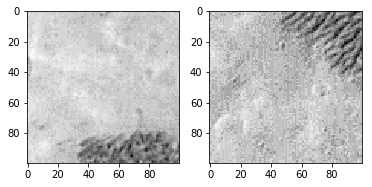

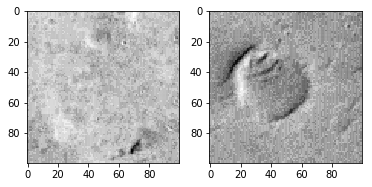

In [19]:
def apply_plot(r, a, b):
    a = a.read_array(pixels=(int(r.source_x-50), int(r.source_y-50),100,100))
    b = b.read_array(pixels=(int(r.destination_x-50), int(r.destination_y-50), 100,100))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(a, cmap='Greys')
    ax2.imshow(b, cmap='Greys')

    return fig

a = e.source.geodata
b = e.destination.geodata
figs = e.matches.head(2).apply(apply_plot, args=(a,b), axis=1)
figs = None